

### Following the amazing "Deep Learning with Python" by François Chollet for 'Binary Classification' problem!


In [0]:
import keras

Using TensorFlow backend.


In [0]:
keras.__version__

'2.2.4'

In [0]:
# importing the IMDB dataset that comes packaged and pre-processed with Keras
from keras.datasets import imdb

In [0]:
# keeping only top 10,000 most frequently occurring words
# contains 50,000 movies reviews out of which 25,000 are for training and remaining 25,000 for testing 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
# train_data and test_data contain list of reviews, where each review consists of list of encoding of sequence of words
# visualized as follows
train_data[2]

[1,
 14,
 47,
 8,
 30,
 31,
 7,
 4,
 249,
 108,
 7,
 4,
 5974,
 54,
 61,
 369,
 13,
 71,
 149,
 14,
 22,
 112,
 4,
 2401,
 311,
 12,
 16,
 3711,
 33,
 75,
 43,
 1829,
 296,
 4,
 86,
 320,
 35,
 534,
 19,
 263,
 4821,
 1301,
 4,
 1873,
 33,
 89,
 78,
 12,
 66,
 16,
 4,
 360,
 7,
 4,
 58,
 316,
 334,
 11,
 4,
 1716,
 43,
 645,
 662,
 8,
 257,
 85,
 1200,
 42,
 1228,
 2578,
 83,
 68,
 3912,
 15,
 36,
 165,
 1539,
 278,
 36,
 69,
 2,
 780,
 8,
 106,
 14,
 6905,
 1338,
 18,
 6,
 22,
 12,
 215,
 28,
 610,
 40,
 6,
 87,
 326,
 23,
 2300,
 21,
 23,
 22,
 12,
 272,
 40,
 57,
 31,
 11,
 4,
 22,
 47,
 6,
 2307,
 51,
 9,
 170,
 23,
 595,
 116,
 595,
 1352,
 13,
 191,
 79,
 638,
 89,
 2,
 14,
 9,
 8,
 106,
 607,
 624,
 35,
 534,
 6,
 227,
 7,
 129,
 113]

In [0]:
# train_labels and test_labels consist of list of associated labels to the reviwes in train_data and test_data, each label
# specifies either "0" for negative and "1" for positive review
# visualized as follows
train_labels[2]

0

In [0]:
# Just for an insight! How can we decode the review back into words?
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[2]])

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
decoded_review

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

In [0]:
# Turning our list of integers into tensors which is necessary for feeding the data into the network
# Vectorization using one-hot-encoding
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
x_train[2]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
# Vectorizing our labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
# Now, for creating the Network's model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Compiling the model, using binary_crossentropy loss function (probably the best choice as this is a binary classification
# and resulting in a probabilistic distribution output) and rmsprop optimizer
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [0]:
# Creating validation dataset consisting of 10,000 data samples from the training dataset, which helps us monitor the model's 
# accuracy on unseen data during training

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
# We will now train our model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors),
# in mini-batches of 512 samples. At this same time we will monitor loss and accuracy on the 10,000 samples that
# we set apart. This is done by passing the validation data as the validation_data argument

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 446us/step - loss: 0.5087 - acc: 0.7813 - val_loss: 0.3796 - val_acc: 0.8694
Epoch 2/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.3005 - acc: 0.9050 - val_loss: 0.3004 - val_acc: 0.8901
Epoch 3/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.2180 - acc: 0.9283 - val_loss: 0.3087 - val_acc: 0.8716
Epoch 4/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.1750 - acc: 0.9434 - val_loss: 0.2841 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.1428 - acc: 0.9542 - val_loss: 0.2848 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.1151 - acc: 0.9653 - val_loss: 0.3150 - val_acc: 0.8773
Epoch 7/20
15000/15000 [==============================] - 2s 156us/step - 

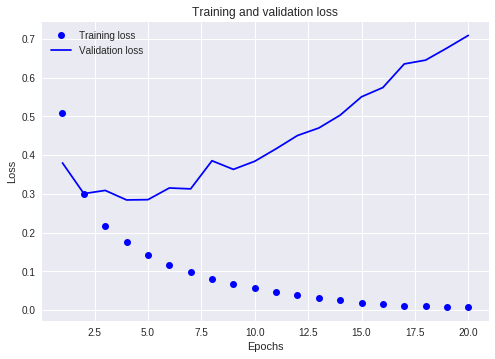

In [0]:
# Plotting graph for training loss versus validation loss

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
# the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about 
# everything that happened during training
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

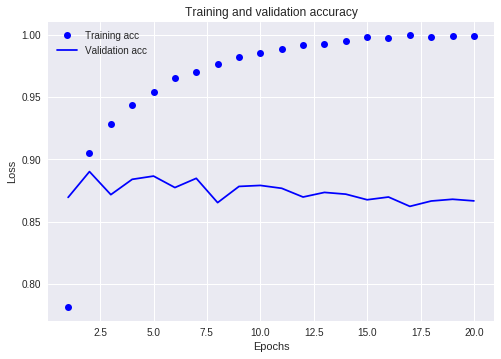

In [0]:
# Plotting graph for training accuracy versus validation accuracy

plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### According to the plots, training loss decreases with every epoch and training accuracy increases but the problem is that validation loss increases after approx. 5 epochs. This is called 'Overfitting' where the model is performing well on training data but not on unseen data i.e. the validation data.

In [0]:
# Training a new model for our Network from scratch for 5 epochs and afterwards evaluating it on our test data

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
25000/25000 [==============================] - 3s 117us/step - loss: 0.4734 - acc: 0.8071
Epoch 2/5
25000/25000 [==============================] - 3s 103us/step - loss: 0.2693 - acc: 0.9096
Epoch 3/5
25000/25000 [==============================] - 3s 104us/step - loss: 0.2063 - acc: 0.9279
Epoch 4/5
25000/25000 [==============================] - 3s 104us/step - loss: 0.1726 - acc: 0.9391
Epoch 5/5
25000/25000 [==============================] - 3s 112us/step


In [0]:
results

[0.3253892980861664, 0.8734]

### The results show we've achieved 87.34 % accuracy! Less but as it's just a starting point, so we can definitely achieve better results with tuning hyper-parameters, a little!

In [0]:
# Following predictions show that our model performs pretty well on some data samples like with probabilities of 0.99 and 0.75 but also un-acceptable performance with 
# probabilities such as 0.04 and 0.10

model.predict(x_test)

array([[0.14027905],
       [0.99997723],
       [0.75893307],
       ...,
       [0.1090464 ],
       [0.0484069 ],
       [0.49122518]], dtype=float32)